In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]
#Вивести перші рядки таблиці за допомогою методу head
df.head(20)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [ ]:
#Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
lines, columns = df.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 28
Number of columns: 9


In [ ]:
#Замініть у таблиці значення "—" на значення NaN
df = df.replace({'—': np.NaN})
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [ ]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [ ]:
#Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
nan_columns = df.columns[df.isnull().any()].tolist()
df[nan_columns] = df[nan_columns].astype(float)

df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [ ]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
df.isnull().sum() / len(df)

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64

In [ ]:
#Видаліть з таблиці дані по всій країні, останній рядок таблиці
df = df.drop([27], axis=0)
df.tail(10)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
17,Сумська,21.6,18.4,13.2,11.5,7.0,9.7,9.2,6.0
18,Тернопільська,21.3,21.6,15.7,14.2,9.2,11.3,10.9,7.6
19,Харківська,19.7,17.3,14.0,11.4,6.8,9.9,10.1,6.8
20,Херсонська,20.8,21.4,16.6,14.3,8.5,11.7,11.5,8.1
21,Хмельницька,23.4,19.8,14.8,12.9,8.5,11.3,11.2,7.9
22,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
23,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


In [ ]:
#Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head(30)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000,20.600000,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.400,19.200000,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.700,25.000000,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.400,20.400000,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.100,21.400000,14.0,10.9,6.1,9.8,8.200,8.017391
5,Житомирська,26.100,22.300000,15.9,12.9,8.9,12.2,12.000,7.900000
6,Закарпатська,31.400,27.300000,20.7,16.8,11.5,15.1,14.600,10.400000
7,Запорізька,21.900,19.700000,15.0,12.4,7.1,10.6,10.600,6.800000
8,Івано-Франківська,24.300,24.800000,18.2,15.5,10.3,12.4,12.200,8.800000
9,Київська,20.400,18.900000,15.6,12.3,7.3,12.2,12.100,8.000000


In [ ]:
#Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
df['2019'] = df['2019'].replace('—', np.nan)

# Преобразуем столбец в числовой формат
df['2019'] = df['2019'].astype(float)

# Теперь можно вычислить среднее значение
avg = df['2019'].mean()

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
result_df = df[df['2019'] > avg]

# Вывести результат
result_df, avg

(               Регіон    1950  1960  1970  1990  2000  2012  2014  2019
 2           Волинська  24.700  25.0  17.9  15.3  11.2  14.8  14.1  10.1
 6        Закарпатська  31.400  27.3  20.7  16.8  11.5  15.1  14.6  10.4
 8   Івано-Франківська  24.300  24.8  18.2  15.5  10.3  12.4  12.2   8.8
 12          Львівська  23.400  24.0  17.1  14.0   9.1  11.9  11.9   8.7
 14            Одеська  24.100  19.2  14.8  12.6   8.0  12.7  12.3   8.8
 16         Рівненська  26.900  26.7  19.3  15.8  11.8  15.9  14.8  10.7
 20         Херсонська  20.800  21.4  16.6  14.3   8.5  11.7  11.5   8.1
 23        Чернівецька  24.700  21.8  17.0  14.8  10.1  12.8  12.9   9.2
 25               Київ  23.104  17.4  15.9  12.0   7.3  12.0  12.1  11.0,
 8.017391304347827)

In [ ]:
# Найти регион с наивысшей рождаемостью в 2014 году
# Заменяем символ "—" на NaN и преобразуем столбец '2014' в числовой формат
df['2014'] = df['2014'].replace('—', np.nan).astype(float)

# Находим регион с наивысшей рождаемостью в 2014 году
region_with_highest_birth_rate_2014 = df[df['2014'] == df['2014'].max()]
highest_birth_rate_region_2014 = region_with_highest_birth_rate_2014.iloc[0]['Регіон']

print("Регіон з найвищою народжуваністю в 2014 році:")
print(highest_birth_rate_region_2014)

Регіон з найвищою народжуваністю в 2014 році:
Рівненська


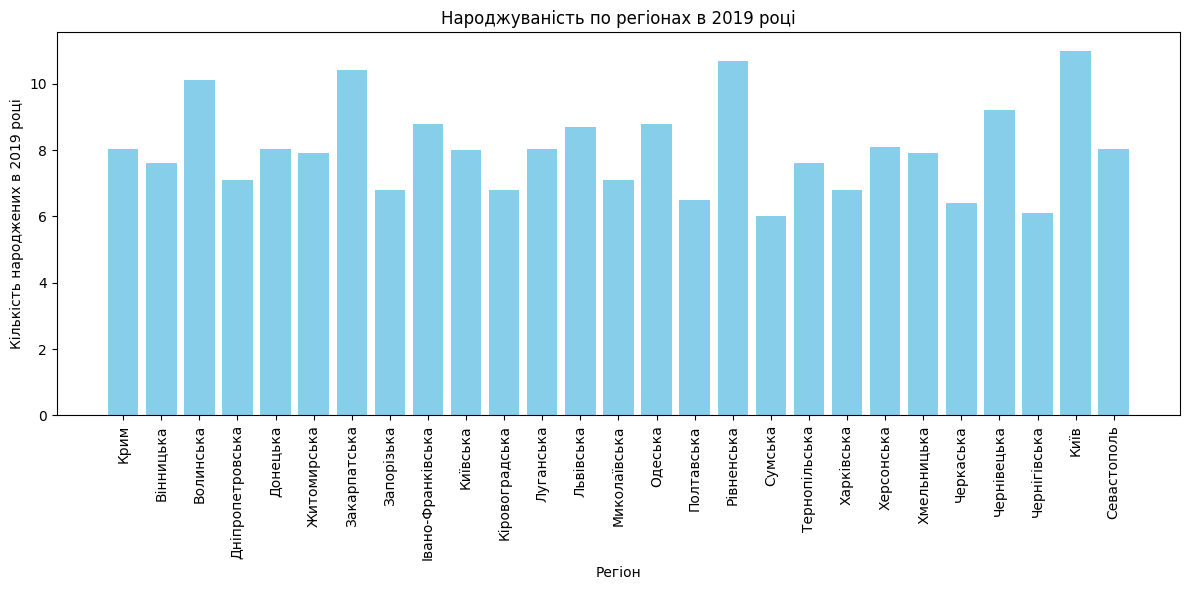

In [ ]:
import matplotlib.pyplot as plt

# Фильтруем DataFrame, чтобы получить только столбцы 'Регіон' и '2019'
birth_rates_2019 = df[['Регіон', '2019']]

# Убираем строки с отсутствующими данными (NaN) в столбце '2019'
birth_rates_2019 = birth_rates_2019.dropna()

# Устанавливаем размер графика
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму
plt.bar(birth_rates_2019['Регіон'], birth_rates_2019['2019'], color='skyblue')
plt.title('Народжуваність по регіонах в 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Кількість народжених в 2019 році')

# Поворачиваем подписи регионов для лучшей читаемости
plt.xticks(rotation=90)

# Отображаем график
plt.tight_layout()
plt.show()

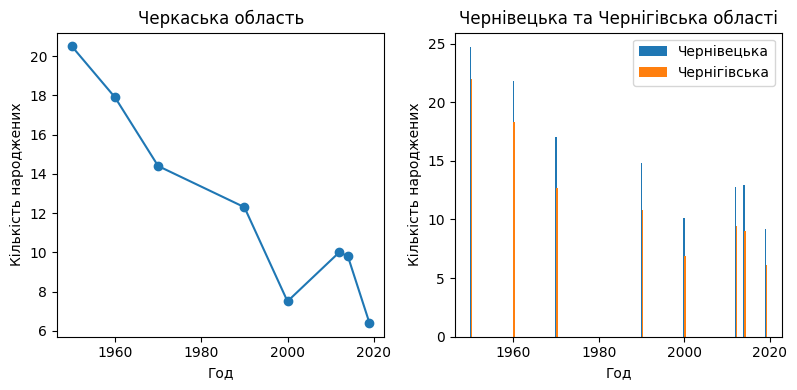

In [ ]:
import matplotlib.pyplot as plt

# Данные
regions = ['Черкаська', 'Чернівецька', 'Чернігівська', 'Київ', 'Севастополь']
years = [1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019]
birth_rates = [
    [20.5, 17.9, 14.4, 12.3, 7.5, 10.0, 9.8, 6.4],
    [24.7, 21.8, 17.0, 14.8, 10.1, 12.8, 12.9, 9.2],
    [22.0, 18.3, 12.7, 10.8, 6.9, 9.4, 9.0, 6.1],
    [None, 17.4, 15.9, 12.0, 7.3, 12.0, 12.1, 11.0],
    [None, None, None, 12.5, 7.0, 12.0, None, None]
]

# Создаем три разных графика
plt.figure(figsize=(12, 4))

# График 1: Линейная диаграмма для одного региона (например, Черкаська)
plt.subplot(131)
plt.plot(years, birth_rates[0], marker='o', linestyle='-')
plt.title('Черкаська область')
plt.xlabel('Год')
plt.ylabel('Кількість народжених')

# График 2: Столбчатая диаграмма для нескольких регионов (например, Чернівецька та Чернігівська)
plt.subplot(132)
plt.bar(years, birth_rates[1], width=0.4, label='Чернівецька', align='center')
plt.bar(years, birth_rates[2], width=0.4, label='Чернігівська', align='edge')
plt.title('Чернівецька та Чернігівська області')
plt.xlabel('Год')
plt.ylabel('Кількість народжених')
plt.legend()

# Выводим графики
plt.tight_layout()
plt.show()

In [ ]:
pip install pandas